## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import r2_score, mean_squared_error

**Ignoring Error Warnings**

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('D:/Rick/Machine Learning/Datasets/rent_price.csv')

In [4]:
data.head()

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,...,0,0,0,0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Polished concrete,Yes,...,0,0,0,0,0,0,0,20,0.0,7500.0


In [5]:
data.shape

(10884, 30)

We have 10,884 entries, as well as 30 variables.

In [6]:
data.dtypes

bedroom                int64
bathrooms              int64
area                 float64
furnishing            object
avalable_for          object
address               object
floor_number           int64
facing                object
floor_type            object
gate_community        object
corner_pro            object
parking                int64
wheelchairadption     object
petfacility           object
aggDur                 int64
noticeDur              int64
lightbill              int64
powerbackup            int64
propertyage           object
no_room                int64
pooja_room             int64
study_room             int64
others                 int64
servant_room           int64
store_room             int64
maintenance_amt       object
brok_amt               int64
deposit_amt            int64
mnt_amt              float64
rent                 float64
dtype: object

In [7]:
data.drop(['address'], axis = 1, inplace = True)

In [8]:
sum(data.brok_amt == 0), sum(data.mnt_amt == 0)

(7816, 9000)

In [9]:
data.drop(['maintenance_amt', 'brok_amt', 'mnt_amt'], axis = 1, inplace = True)

In [10]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
bedroom,10884.0,1.80,0.81,1.0,1.0,2.0,2.0,22.0
bathrooms,10884.0,1.78,0.83,1.0,1.0,2.0,2.0,22.0
area,10884.0,528.56,930.46,0.0,0.0,510.0,840.0,72775.0
floor_number,10884.0,3.06,2.39,0.0,1.0,3.0,5.0,9.0
parking,10884.0,0.88,0.56,0.0,1.0,1.0,1.0,9.0
aggDur,10884.0,7.42,7.67,0.0,0.0,11.0,11.0,36.0
noticeDur,10884.0,0.72,0.70,0.0,0.0,1.0,1.0,6.0
lightbill,10884.0,0.17,0.38,0.0,0.0,0.0,0.0,1.0
powerbackup,10884.0,0.71,0.84,0.0,0.0,0.0,2.0,2.0
no_room,10884.0,0.75,0.43,0.0,1.0,1.0,1.0,1.0


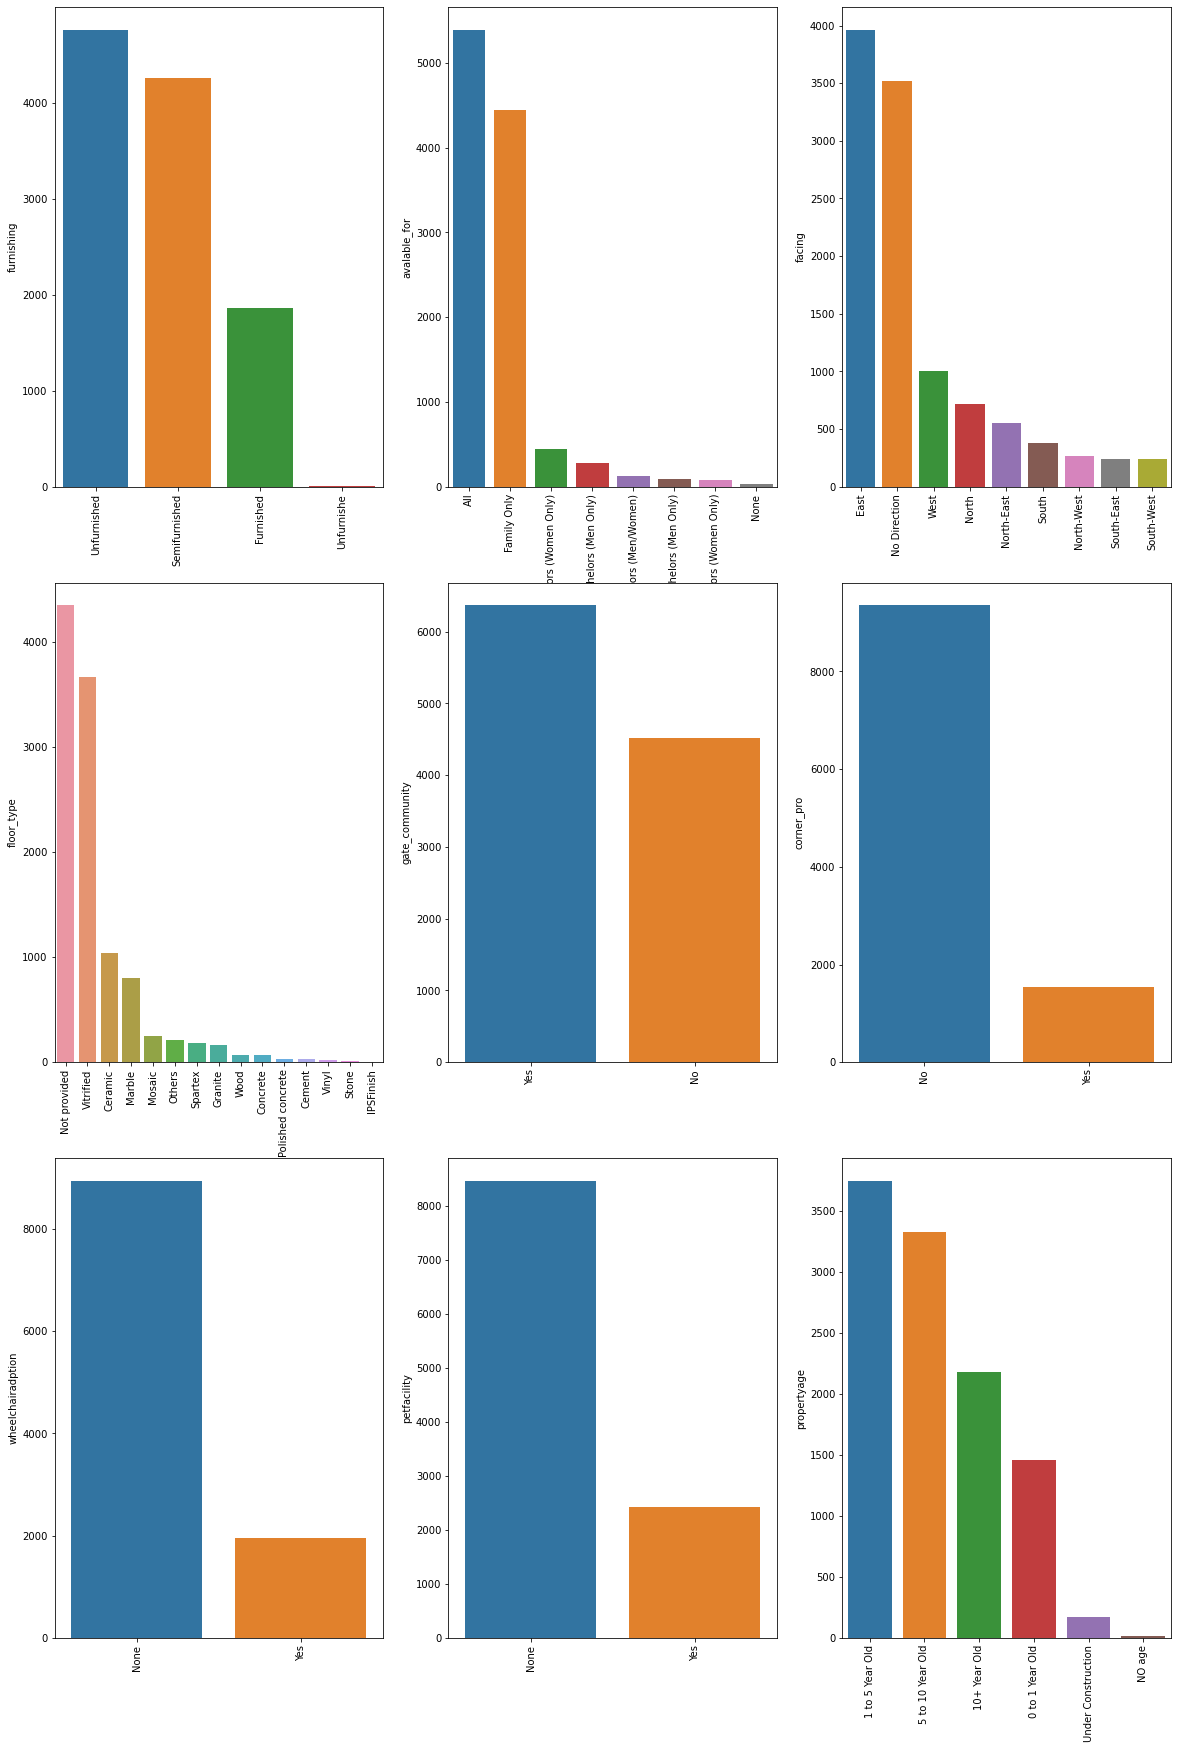

In [11]:
nn_columns = data.select_dtypes(include = ['object']).columns

plt.figure(figsize = (20, 30))

for col, i in zip(nn_columns, range(len(nn_columns))):
    plt.subplot(3, 3, i+1)
    sns.barplot(x = data[col].value_counts().index, y = data[col].value_counts())
    plt.xticks(rotation = 90)

In [12]:
data.furnishing = data.furnishing.replace('Unfurnishe', 'Unfurnished')
data.furnishing.unique()

array(['Unfurnished', 'Semifurnished', 'Furnished'], dtype=object)

## Handling the Missing Values

In [13]:
data['avalable_for'].replace('None', np.nan, inplace = True)
data['facing'].replace('No Direction', np.nan, inplace = True)
data['propertyage'].replace('NO age', np.nan, inplace = True)

In [14]:
data['area'].replace(0, np.nan, inplace = True)
data['aggDur'].replace(0, np.nan, inplace = True)

In [15]:
data.isnull().sum()

bedroom                 0
bathrooms               0
area                 4052
furnishing              0
avalable_for           30
floor_number            0
facing               3521
floor_type              0
gate_community          0
corner_pro              0
parking                 0
wheelchairadption       0
petfacility             0
aggDur               4645
noticeDur               0
lightbill               0
powerbackup             0
propertyage            11
no_room                 0
pooja_room              0
study_room              0
others                  0
servant_room            0
store_room              0
deposit_amt             0
rent                    0
dtype: int64

In [16]:
n_columns = data.select_dtypes(exclude = ['object']).columns

impute_knn = KNNImputer()
data[n_columns] = impute_knn.fit_transform(data[n_columns])

In [17]:
data.dropna(subset = ['avalable_for', 'propertyage'], inplace = True)

In [18]:
data['facing'] = data['facing'].fillna(data['facing'].mode()[0])

In [19]:
data.isnull().sum().sum()

0

The linear regression analysis requires the dependent variable, 'rent', to be normally distributed. A histogram can check if the target variable is normally distributed.

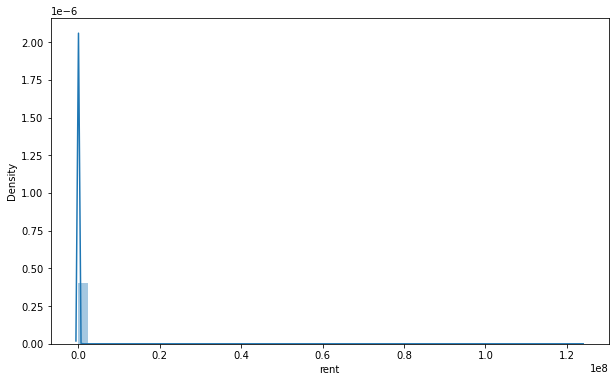

In [20]:
plt.figure(figsize = (10, 6))
sns.distplot(data.rent)
plt.show()

As the plot shows, our target variable, 'rent', is not normally distributed.

We can calculate the skewness level of the target variable, 'rent'.

In [21]:
print(f"Skewness: {data.rent.skew()}")

Skewness: 104.13272308545052


* If the skewness is between -0.5 to 0.5, the data are fairly symmetrical.
* If the skewness is between -1 to -0.5 or between 0.5 to 1, the data are moderately skewed.
* If the skewness is less than -1 or greater than 1, the data are highly skewed.

In our case, we have 104.13, so it is considered as highly skewed data.

Now, we can try to transform our data, so it looks more normally distributed.

### Log Transformation

In [22]:
log_rent = np.log(data.rent)

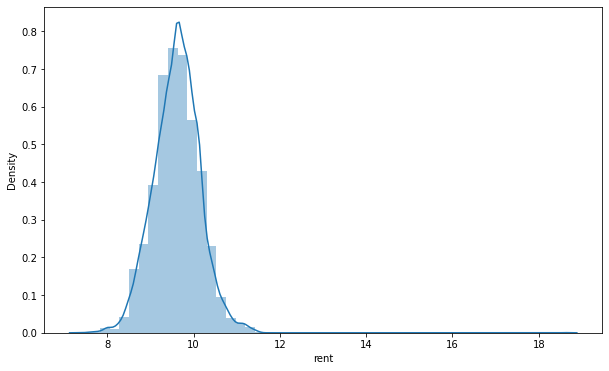

In [23]:
plt.figure(figsize = (10, 6))
sns.distplot(log_rent)
plt.show()

We can also check statistically if the target is normally distributed, using `normaltest()` function.

In [24]:
from scipy.stats.mstats import normaltest

In [25]:
normaltest(log_rent)

NormaltestResult(statistic=1910.1399092886325, pvalue=0.0)

As we can see, the p value is 0, so it is not normally distributed.

In [26]:
log_rent.skew()

0.4261682304469876

### Sqaure Root Transformation

In [27]:
sqrt_rent = np.sqrt(data.rent)

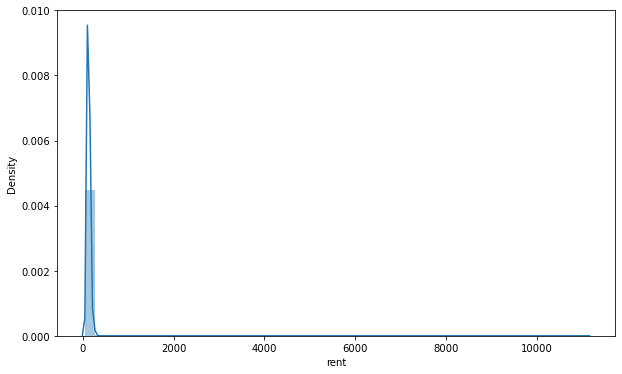

In [28]:
plt.figure(figsize = (10, 6))
sns.distplot(sqrt_rent)
plt.show()

In [29]:
normaltest(sqrt_rent.values)

NormaltestResult(statistic=41656.91972851202, pvalue=0.0)

### Box Cox Transformation

In [30]:
from scipy.stats import boxcox

In [31]:
bc_result = boxcox(data.rent)
bc_rent = bc_result[0]
lam = bc_result[1]

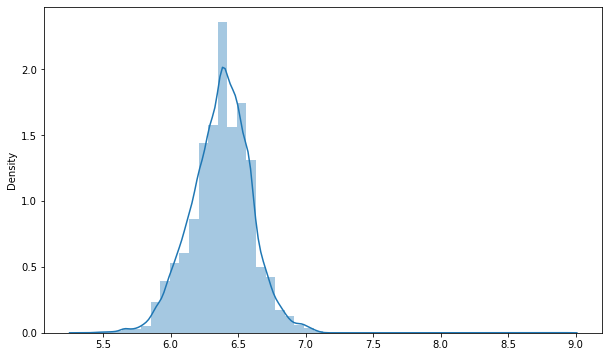

In [32]:
plt.figure(figsize = (10, 6))
sns.distplot(bc_rent)
plt.show()

In [33]:
normaltest(bc_rent)

NormaltestResult(statistic=497.8406666015638, pvalue=7.857290568039228e-109)

The p-value is very small, (< 0.05), so the target variable is still not normally distributed.

In [34]:
from scipy.stats import skew
skew(bc_rent)

-0.04298083231502449

## Handling the Outliers

In [35]:
data['rent_zscore'] = (bc_rent - bc_rent.mean())/bc_rent.std()

In [36]:
data[(data['rent_zscore'] > 3) | (data['rent_zscore'] < -3)]

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,...,propertyage,no_room,pooja_room,study_room,others,servant_room,store_room,deposit_amt,rent,rent_zscore
348,1.0,2.0,665.0,Unfurnished,All,0.0,East,Not provided,No,No,...,0 to 1 Year Old,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3000.0,-3.222051
417,1.0,1.0,450.0,Semifurnished,Bachelors (Men Only),2.0,South-East,Ceramic,Yes,No,...,10+ Year Old,1.0,0.0,0.0,0.0,0.0,0.0,5000.0,3000.0,-3.222051
599,1.0,1.0,200.0,Unfurnished,All,2.0,South-East,Ceramic,No,No,...,0 to 1 Year Old,0.0,0.0,0.0,1.0,0.0,0.0,5000.0,3000.0,-3.222051
626,4.0,5.0,4000.0,Furnished,Family Only,3.0,North,Others,No,No,...,5 to 10 Year Old,0.0,1.0,0.0,1.0,1.0,0.0,350000.0,90000.0,3.125413
678,1.0,1.0,510.0,Unfurnished,All,0.0,South,Granite,Yes,No,...,1 to 5 Year Old,0.0,0.0,0.0,1.0,0.0,0.0,5000.0,3000.0,-3.222051
908,1.0,1.0,422.0,Unfurnished,All,0.0,North-East,Cement,No,No,...,1 to 5 Year Old,0.0,0.0,0.0,1.0,0.0,0.0,10000.0,3000.0,-3.222051
1096,1.0,1.0,705.0,Semifurnished,Bachelors (Men Only),0.0,East,Not provided,No,No,...,1 to 5 Year Old,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,-4.120082
1105,4.0,4.0,1816.0,Furnished,Family Only,9.0,East,Not provided,No,No,...,0 to 1 Year Old,1.0,0.0,0.0,0.0,0.0,0.0,500000.0,90000.0,3.125413
1171,1.0,1.0,100.0,Semifurnished,Bachelors (Men Only),0.0,East,Not provided,No,No,...,10+ Year Old,1.0,0.0,0.0,0.0,0.0,0.0,6000.0,3000.0,-3.222051
1731,1.0,1.0,500.0,Semifurnished,Bachelors (Women Only),3.0,North,Others,No,No,...,1 to 5 Year Old,1.0,0.0,0.0,0.0,0.0,0.0,5000.0,3000.0,-3.222051


In [37]:
data = data[(data['rent_zscore'] < 3) & (data['rent_zscore'] > -3)]

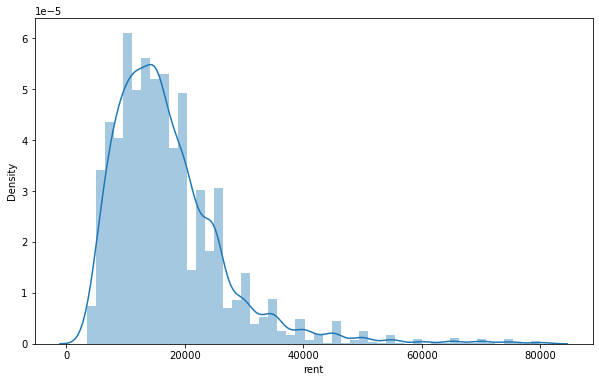

In [38]:
plt.figure(figsize = (10, 6))
sns.distplot(data.rent)
plt.show()

In [39]:
bc_result = boxcox(data.rent)
bc_rent = bc_result[0]
lam = bc_result[1]

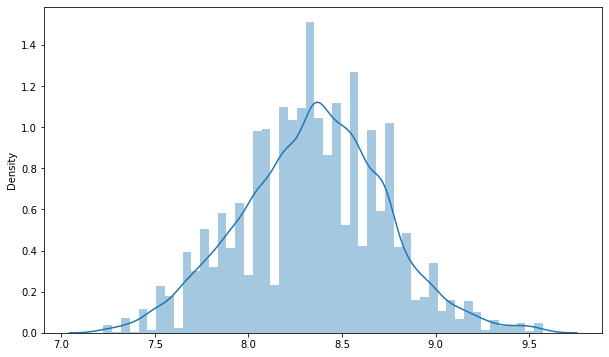

In [40]:
plt.figure(figsize = (10, 6))
sns.distplot(bc_rent)
plt.show()

In [41]:
normaltest(bc_rent)

NormaltestResult(statistic=2.468981853756408, pvalue=0.29098285622035863)

In [42]:
skew(bc_rent)

-0.00041132674000730446

In [43]:
columns = ['area', 'aggDur', 'deposit_amt']

for col in columns:
    percentile25 = data[col].quantile(0.25)
    percentile75 = data[col].quantile(0.75)
    
    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    
    data[col] = np.where(data[col] > upper_limit, 
                         upper_limit, 
                         np.where(data[col] < lower_limit, 
                                  lower_limit, 
                                  data[col]))

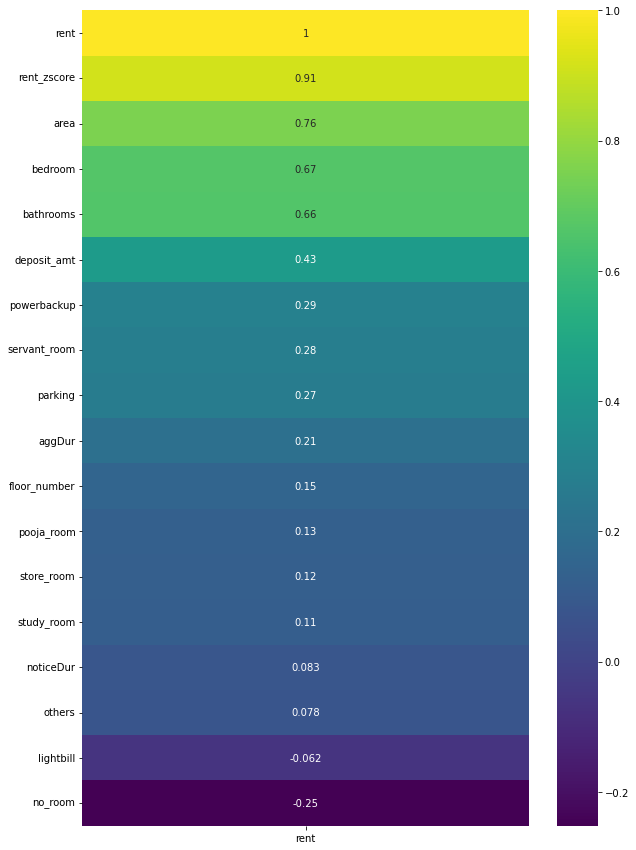

In [44]:
plt.figure(figsize = (10, 15))
sns.heatmap(data.corr()[['rent']].sort_values(by = 'rent', ascending = False), annot = True, cmap = 'viridis')
plt.show()

Above, there are 3 features, with coefficients greater than 0.5, that are strongly correlated with the `rent`.

## Encoding Non-numeric Columns

In [45]:
pd.Series({col: data[col].unique() for col in nn_columns})

furnishing                     [Unfurnished, Semifurnished, Furnished]
avalable_for         [All, Family Only, Family , Bachelors (Men Onl...
facing               [West, East, South-West, South, North, North-W...
floor_type           [Marble, Vitrified, Mosaic, Polished concrete,...
gate_community                                               [Yes, No]
corner_pro                                                   [No, Yes]
wheelchairadption                                          [None, Yes]
petfacility                                                [None, Yes]
propertyage          [5 to 10 Year Old, 1 to 5 Year Old, 10+ Year O...
dtype: object

**One Hot Encoding**

In [46]:
data = pd.get_dummies(data, columns = ['avalable_for', 'floor_type', 'facing'])

In [47]:
data.shape

(10787, 54)

**Label Encoding**

In [48]:
label_encode_cols = ['gate_community', 'corner_pro', 'wheelchairadption', 'petfacility']

le = LabelEncoder()

for col in label_encode_cols:
    data[col] = le.fit_transform(np.array(data[col]))

In [49]:
data.furnishing.replace({'Unfurnished': 0, 'Semifurnished': 1, 'Furnished': 2}, inplace = True)

data.propertyage.replace({'Under Construction': 0, '0 to 1 Year Old': 1, '1 to 5 Year Old': 2, 
                          '5 to 10 Year Old': 3, '10+ Year Old': 4}, inplace = True)

**Creating X and y**

In [50]:
X = data.drop(columns = 'rent')
y = data.rent

## Train Test Split

We will use 30% of the data for testing and 70% for training.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")

Number of training samples: 7550
Number of test samples: 3237


## Feature Scaling

In [52]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [53]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)

lr_pred = lr.predict(X_test_s)

The following function will calculate the root mean squared error

In [54]:
def rmse(yt, yp):
    return np.sqrt(mean_squared_error(yt, yp))

In [55]:
print(f'R^2: ', r2_score(y_test, lr_pred))
print(f'RMSE:', rmse(y_test, lr_pred))

R^2:  0.8649632940684766
RMSE: 3533.1886545671655


In [56]:
pd.DataFrame({'Actual Price': y_test, 'Predicted Price': lr_pred})

,Actual Price,Predicted Price
8779,11000.0,10075.288145
10603,20000.0,20992.522520
3645,8000.0,5190.272520
4504,12500.0,13432.772520
8119,6000.0,701.684629
...,...,...
2771,9000.0,8039.713926
7423,14000.0,14531.397520
6411,16000.0,19275.897520
6073,13500.0,14895.288145


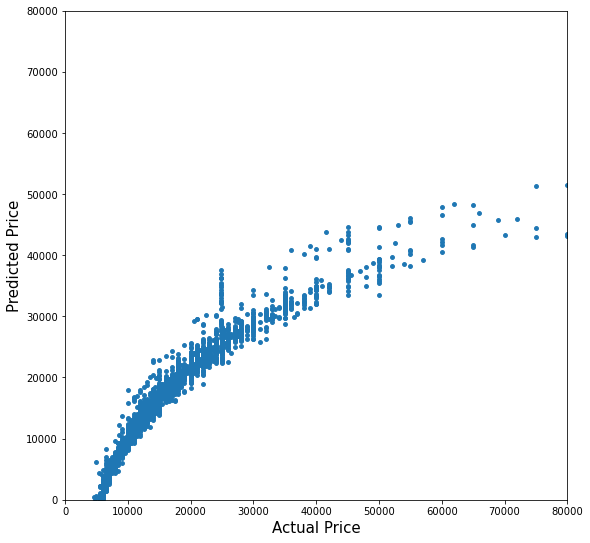

In [57]:
plt.figure(figsize = (9, 9))
plt.scatter(y_test, lr_pred, s = 15.0)
plt.xlabel('Actual Price', fontsize = 15)
plt.ylabel('Predicted Price', fontsize = 15)
lim = (0, y_test.max())
plt.xlim(lim), plt.ylim(lim)
plt.show()

The function below will plot the distributions of the predicted values versus the actual values.

In [58]:
def plot_dis(yt, yp):
    plt.figure(figsize = (10, 6))
    
    sns.kdeplot(yt, color = 'r', label = 'Actual Values')
    sns.kdeplot(yp, color = 'b', label = 'Fitted Values')
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price')
    
    plt.show()

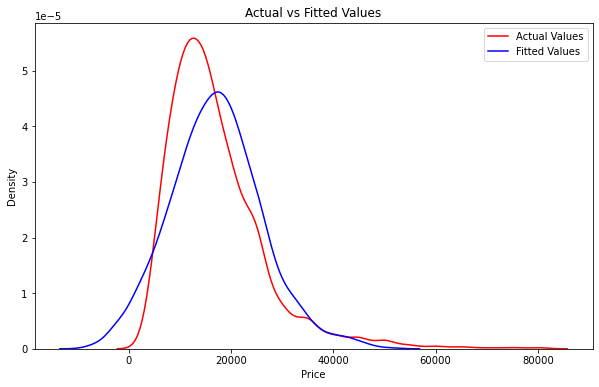

In [59]:
plot_dis(y_test, lr_pred)

In [60]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [61]:
lr = LinearRegression()
lr.fit(X_train_s, y_train_bc)

y_pred_bc = lr.predict(X_test_s)

In [62]:
from scipy.special import inv_boxcox

In [63]:
y_pred = inv_boxcox(y_pred_bc, lam2)

print(f'R^2: ', r2_score(y_test, y_pred))
print(f'RMSE:', rmse(y_test, y_pred))

R^2:  0.9981130727412936
RMSE: 417.6557729798713


In [64]:
pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

,Actual Price,Predicted Price
8779,11000.0,10997.610797
10603,20000.0,20032.831443
3645,8000.0,7939.810169
4504,12500.0,12552.985670
8119,6000.0,5890.745480
...,...,...
2771,9000.0,8991.486019
7423,14000.0,14053.780421
6411,16000.0,16190.779204
6073,13500.0,13567.801105


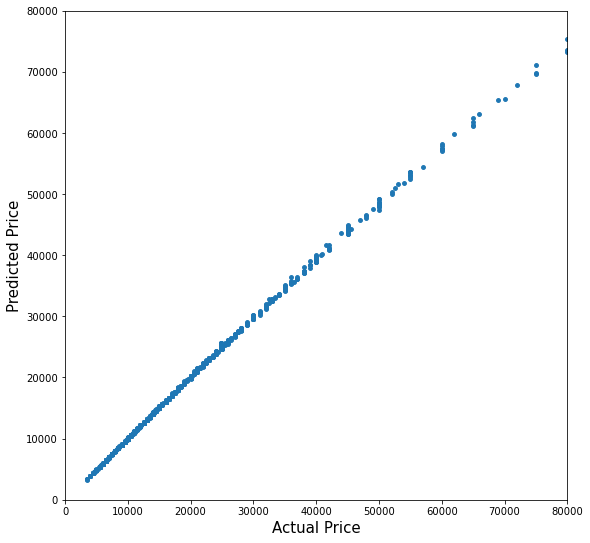

In [65]:
plt.figure(figsize = (9, 9))
plt.scatter(y_test, y_pred, s = 15.0)
plt.xlabel('Actual Price', fontsize = 15)
plt.ylabel('Predicted Price', fontsize = 15)
lim = (0, y_test.max())
plt.xlim(lim), plt.ylim(lim)
plt.show()

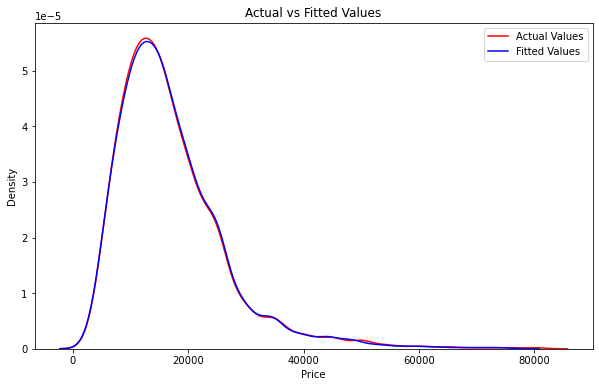

In [66]:
plot_dis(y_test, y_pred)